In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('CreditScoring.csv')
df.head(5)

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [4]:
df.columns = df.columns.str.lower()
df.head(5)

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [5]:
df.dtypes
# but some values despite being `int`
# are categorical.
# Ex: status, home, marital, records, job

status       int64
seniority    int64
home         int64
time         int64
age          int64
marital      int64
records      int64
job          int64
expenses     int64
income       int64
assets       int64
debt         int64
amount       int64
price        int64
dtype: object

In [6]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

In [7]:
df.status = df.status.map(status_values)
df.home = df.home.map(home_values)
df.marital = df.marital.map(marital_values)
df.records = df.records.map(records_values)
df.job = df.job.map(job_values)

In [8]:
df.head(5)

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [9]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [10]:
for col in ['income', 'assets', 'debt']:
    df[col] = df[col].replace(to_replace=99999999, value=np.nan)

In [11]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [12]:
# status is our target value
df.status.value_counts()

ok         3200
default    1254
unk           1
Name: status, dtype: int64

In [13]:
# Let's remove row `unk` as it's useless for us.
# But we don't want to actually delete its 
df = df[df.status != 'unk']

In [14]:
df.isnull().sum()
# we'll need to replace those `isnull` with something

status        0
seniority     0
home          0
time          0
age           0
marital       0
records       0
job           0
expenses      0
income       34
assets       47
debt         18
amount        0
price         0
dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

# 20 % - test; 20% - validation; 60% - training
full_train, df_test = train_test_split(df, random_state=11, test_size=0.2)
df_train, df_valid = train_test_split(full_train, random_state=11, test_size=0.25)
# why 0.25? `full_train` has 80% of initial data. 20 % from 80% is 0.25

In [16]:
len(df_test), len(df_train), len(df_valid)

(891, 2672, 891)

In [17]:
# `1` - client defaulted
# `0` - not defaulted
y_train = (df_train.status == 'default').values
y_valid = (df_valid.status == 'default').values

del df_train['status']
del df_valid['status']

In [18]:
df_train = df_train.fillna(0)
df_valid = df_valid.fillna(0)

In [19]:
from sklearn.feature_extraction import DictVectorizer

dict_train = df_train.to_dict(orient='records')
dict_valid = df_valid.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
# instead of 1) dv.fit(dict_train) 2) dv.transform(dict_train)
X_train = dv.fit_transform(dict_train)
X_valid = dv.transform(dict_valid)

# Decision Trees

consisits of nodes with conditions. If condition is satisfied -> go right else go left

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

In [21]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)
# Does 1.0 mean that we can predict default without errors?
# Let's analyze it.

1.0

In [23]:
y_pred_valid = dt.predict_proba(X_valid)[:, 1]
roc_auc_score(y_valid, y_pred_valid)

0.6510377564118088

<h3>1.0 from above is called `overfitting` when our model literally memorizes the results for each customer.
    <br>
    In such cases we say: model can't <ins>generalize</ins>
</h3>

Why does that happen? The model is too complex with enough power to remember all the training data. 
**Solution:** make the model simpler to make it less powerful which will improve model's ability to generalize.
There're multiple ways to make the tree simpler:
1. The more levels in the tree the more powerful it is, hence
   lowering the size will make it simpler and less prone to    overfitting. `max_depth` parameter by default is None -> tree can grow as large as it can. So, restricting params. will make it simpler

In [24]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [25]:
from sklearn.tree import export_text

tree_text = export_text(dt, feature_names=dv.feature_names_)
print(tree_text)
# True == deafult (1)
# False == no default (0)

|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- class: False
|   |--- job=partime >  0.50
|   |   |--- class: True
|--- records=yes >  0.50
|   |--- seniority <= 6.50
|   |   |--- class: True
|   |--- seniority >  6.50
|   |   |--- class: False



In [26]:
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print(f"train auc: {auc}")

y_pred = dt.predict_proba(X_valid)[:, 1]
auc = roc_auc_score(y_valid, y_pred)
print(f"valid auc: {auc}")

train auc: 0.7054989859726213
valid auc: 0.6685264343319367


# Parameter tuning for dec. tree

It's a process of finding the best set of params.

In [27]:
for depth in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_valid)[:, 1]
    auc = roc_auc_score(y_valid, y_pred)
    if depth is not None:
        print(f"{round(depth, 3)}, {round(auc, 3)}")
    else:
        print(f"No depth, {round(auc, 3)}")

1, 0.606
2, 0.669
3, 0.739
4, 0.761
5, 0.767
6, 0.758
10, 0.685
15, 0.663
20, 0.657
No depth, 0.648


In [28]:
# from above we see that best 3 depths are: 4/5/6
values = []

for d in [4, 5, 6]:
    print(f"Depth: {d}")
    
    for leaf in [1, 5, 10, 15, 20, 50, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=leaf)
        dt.fit(X_train, y_train)
        y_pred = dt.predict_proba(X_valid)[:, 1]
        auc = roc_auc_score(y_valid, y_pred)
        values.append([d, leaf, auc])
        print(f"{leaf}, {auc}")
    
    print('break')

Depth: 4
1, 0.7612827250490422
5, 0.7612827250490422
10, 0.7612827250490422
15, 0.7637257513743916
20, 0.760910367876777
50, 0.7534571698433072
100, 0.7559365236976581
200, 0.7472602988544719
break
Depth: 5
1, 0.7664957254607541
5, 0.7681728463829891
10, 0.7618094742195636
15, 0.7724050035116611
20, 0.7740276331403937
50, 0.7681970647356566
100, 0.7633836671429609
200, 0.7590728003681189
break
Depth: 6
1, 0.7533148870213848
5, 0.7626510619747644
10, 0.7782991450921508
15, 0.785470804775859
20, 0.7739822237291418
50, 0.770288924947325
100, 0.7764343319367417
200, 0.7682666924995762
break


In [29]:
values

[[4, 1, 0.7612827250490422],
 [4, 5, 0.7612827250490422],
 [4, 10, 0.7612827250490422],
 [4, 15, 0.7637257513743916],
 [4, 20, 0.760910367876777],
 [4, 50, 0.7534571698433072],
 [4, 100, 0.7559365236976581],
 [4, 200, 0.7472602988544719],
 [5, 1, 0.7664957254607541],
 [5, 5, 0.7681728463829891],
 [5, 10, 0.7618094742195636],
 [5, 15, 0.7724050035116611],
 [5, 20, 0.7740276331403937],
 [5, 50, 0.7681970647356566],
 [5, 100, 0.7633836671429609],
 [5, 200, 0.7590728003681189],
 [6, 1, 0.7533148870213848],
 [6, 5, 0.7626510619747644],
 [6, 10, 0.7782991450921508],
 [6, 15, 0.785470804775859],
 [6, 20, 0.7739822237291418],
 [6, 50, 0.770288924947325],
 [6, 100, 0.7764343319367417],
 [6, 200, 0.7682666924995762]]

In [30]:
# best decision tree is depth = 6, min_sample_leaf = 15

dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict_proba(X_valid)[:, 1]
roc_auc_score(y_valid, y_pred_dt)

0.7850954203095104

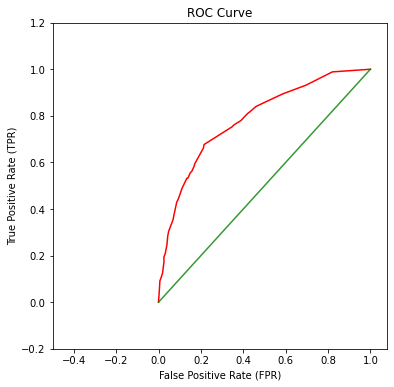

In [31]:
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(y_valid, y_pred_dt)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='red')
plt.plot([0, 1], [0, 1], color='green', alpha=0.8)
# `alpha` regulates transparency

plt.xlim([-0.5, 1.08])
plt.ylim([-0.2, 1.2])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')

plt.show()

# Ensemble learning - Random Forest

In [32]:
# without `random_state`
from sklearn.ensemble import RandomForestClassifier

aucs = []

for i in range(100):
    rf = RandomForestClassifier(n_estimators=10)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_valid)[:, 1]
    auc = roc_auc_score(y_valid, y_pred)
    aucs.append(auc)

auc_mean = np.mean(aucs)
auc_std = np.std(aucs)

print(f"{round(auc_mean, 3)} += {round(auc_std, 3)}")
print(f"{round(auc_mean - auc_std, 3)} -- {round(auc_mean + auc_std, 3)}")

0.784 += 0.009
0.775 -- 0.793


In [33]:
# n_estimators = № of trees to include
rf = RandomForestClassifier(n_estimators=10, random_state=3)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=3)

In [34]:
y_pred = rf.predict_proba(X_valid)[:, 1]
roc_auc_score(y_valid, y_pred)
# we'll see a slightly different result every time
# as `random_state` isn't set -> model geenrates
# random set of features every time

0.7811145285897654

In [35]:
# but too many trees is bad -> let's find best number

aucs = []

for i in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=i, random_state=3)
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict_proba(X_valid)[:, 1]
    auc = roc_auc_score(y_valid, y_pred)
    print(f"№ trees: {round(i, 3)}; auc: {round(auc, 3)}")
    
    aucs.append(auc)

№ trees: 10; auc: 0.781
№ trees: 20; auc: 0.801
№ trees: 30; auc: 0.813
№ trees: 40; auc: 0.815
№ trees: 50; auc: 0.816
№ trees: 60; auc: 0.817
№ trees: 70; auc: 0.818
№ trees: 80; auc: 0.818
№ trees: 90; auc: 0.82
№ trees: 100; auc: 0.819
№ trees: 110; auc: 0.819
№ trees: 120; auc: 0.821
№ trees: 130; auc: 0.822
№ trees: 140; auc: 0.822
№ trees: 150; auc: 0.82
№ trees: 160; auc: 0.82
№ trees: 170; auc: 0.819
№ trees: 180; auc: 0.82
№ trees: 190; auc: 0.82
№ trees: 200; auc: 0.82


In [36]:
aucs

[0.7811145285897654,
 0.80073744883873,
 0.8134339202247464,
 0.8154198251434936,
 0.8159617107844324,
 0.8168426533627182,
 0.8184895013441186,
 0.8178628514688431,
 0.8198275653290064,
 0.819043496161391,
 0.8192856796880676,
 0.8211353563730595,
 0.8221283088324333,
 0.8218770434235063,
 0.8204663243806156,
 0.8198941657988423,
 0.8193310890993194,
 0.8195460269792448,
 0.8201726768545202,
 0.8202241408539391]

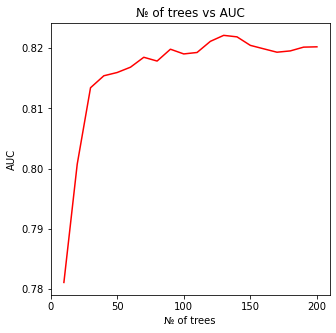

In [37]:
trees = list(map(lambda x: x, range(10, 201)))
plt.figure(figsize=(5,5))
plt.plot(range(10, 201, 10), aucs, color='red')
# plt.plot(trees[::10], aucs, color='red')

plt.title('№ of trees vs AUC')
plt.xlabel('№ of trees')
plt.ylabel('AUC')
plt.xticks(range(0, 201, 50))
plt.show()

# Parameter tuning for random forest

as RF consists of multiple decision trees we'll have the same params: max_depth & min_leaf_size

In [38]:
all_aucs = {}

for d in [5, 10, 20]:
    print(f"depth: {d}")
    aucs = []
    
    for i in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=i, max_depth=d,
                                   random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_valid)[:, 1]
        auc = roc_auc_score(y_valid, y_pred)
        print(f"№ trees: {i}; depth: {d}")
        aucs.append(auc)
    
    all_aucs[d] = aucs
    print('Break')

depth: 5
№ trees: 10; depth: 5
№ trees: 20; depth: 5
№ trees: 30; depth: 5
№ trees: 40; depth: 5
№ trees: 50; depth: 5
№ trees: 60; depth: 5
№ trees: 70; depth: 5
№ trees: 80; depth: 5
№ trees: 90; depth: 5
№ trees: 100; depth: 5
№ trees: 110; depth: 5
№ trees: 120; depth: 5
№ trees: 130; depth: 5
№ trees: 140; depth: 5
№ trees: 150; depth: 5
№ trees: 160; depth: 5
№ trees: 170; depth: 5
№ trees: 180; depth: 5
№ trees: 190; depth: 5
№ trees: 200; depth: 5
Break
depth: 10
№ trees: 10; depth: 10
№ trees: 20; depth: 10
№ trees: 30; depth: 10
№ trees: 40; depth: 10
№ trees: 50; depth: 10
№ trees: 60; depth: 10
№ trees: 70; depth: 10
№ trees: 80; depth: 10
№ trees: 90; depth: 10
№ trees: 100; depth: 10
№ trees: 110; depth: 10
№ trees: 120; depth: 10
№ trees: 130; depth: 10
№ trees: 140; depth: 10
№ trees: 150; depth: 10
№ trees: 160; depth: 10
№ trees: 170; depth: 10
№ trees: 180; depth: 10
№ trees: 190; depth: 10
№ trees: 200; depth: 10
Break
depth: 20
№ trees: 10; depth: 20
№ trees: 20; d

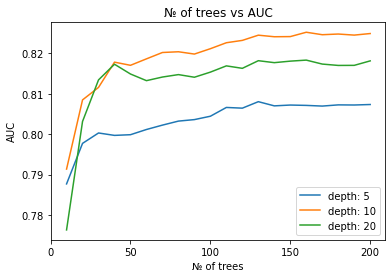

In [411]:
trees = list(range(10, 201, 10))

plt.plot(trees, all_aucs[5], label='depth: 5')
plt.plot(trees, all_aucs[10], label='depth: 10')
plt.plot(trees, all_aucs[20], label='depth: 20')

plt.xticks(range(0, 201, 50))
plt.title('№ of trees vs AUC')
plt.xlabel('№ of trees')
plt.ylabel('AUC')

plt.legend()
plt.show()

In [412]:
# from previous analysis we see that depth: 10 is the best
# Now let's tune min_samples_leaf parameter
all_aucs = {}

for m in [3, 5, 10]:
    print(f"min_leaf: {m}")
    aucs = []
    
    for i in range(10, 201, 20):
        rf = RandomForestClassifier(n_estimators=i, max_depth=10, random_state=1, min_samples_leaf=m)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_valid)[:, 1]
        auc = roc_auc_score(y_valid, y_pred)
        print(f"№ trees: {i}; auc: {auc}")
        aucs.append(auc)
    
    all_aucs[m] = aucs
    print('Break')

min_leaf: 3
№ trees: 10; auc: 0.8107577922549707
№ trees: 30; auc: 0.822530938945533
№ trees: 50; auc: 0.8229365963527162
№ trees: 70; auc: 0.8215379864861592
№ trees: 90; auc: 0.8232817078782301
№ trees: 110; auc: 0.8234027996415685
№ trees: 130; auc: 0.8244139158654429
№ trees: 150; auc: 0.8248498462134606
№ trees: 170; auc: 0.8249588288004649
№ trees: 190; auc: 0.8251465210336393
Break
min_leaf: 5
№ trees: 10; auc: 0.8129465258773099
№ trees: 30; auc: 0.817802305587174
№ trees: 50; auc: 0.821265530018648
№ trees: 70; auc: 0.8221979365963527
№ trees: 90; auc: 0.8224703930638638
№ trees: 110; auc: 0.8245471168051149
№ trees: 130; auc: 0.8252857765614783
№ trees: 150; auc: 0.825031483858468
№ trees: 170; auc: 0.8248680099779613
№ trees: 190; auc: 0.8259517812598386
Break
min_leaf: 10
№ trees: 10; auc: 0.809664939090843
№ trees: 30; auc: 0.822319028359691
№ trees: 50; auc: 0.8223795742413602
№ trees: 70; auc: 0.8193825530987382
№ trees: 90; auc: 0.820369450969945
№ trees: 110; auc: 0.81

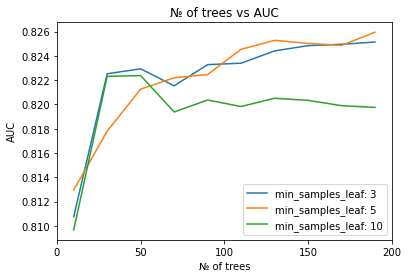

In [413]:
trees = list(range(10, 201, 20))

plt.plot(trees, all_aucs[3], label='min_samples_leaf: 3')
plt.plot(trees, all_aucs[5], label='min_samples_leaf: 5')
plt.plot(trees, all_aucs[10], label='min_samples_leaf: 10')

plt.xticks(range(0, 201, 50))

plt.title('№ of trees vs AUC')
plt.xlabel('№ of trees')
plt.ylabel('AUC')
plt.legend()
plt.show()

In [414]:
rf = RandomForestClassifier(n_estimators=200, max_depth=10,
                            min_samples_leaf=5, random_state=1)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict_proba(X_valid)[:, 1]
roc_auc_score(y_valid, y_pred_rf)

0.8253826499721489

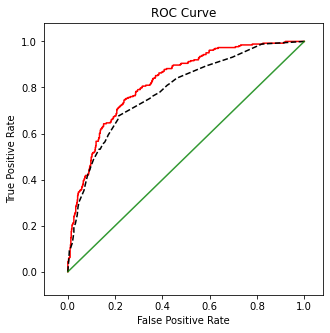

In [415]:
plt.figure(figsize=(5, 5))

fpr, tpr, thresholds = roc_curve(y_valid, y_pred_rf)
plt.plot(fpr, tpr, color='red')

fpr, tpr, threshold = roc_curve(y_valid, y_pred_dt)
plt.plot(fpr, tpr, color='black', linestyle='dashed')

plt.plot([0, 1], [0, 1], color='green', alpha=0.8)

plt.xlim([-0.1, 1.08])
plt.ylim([-0.1, 1.08])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.show()

# Gradient boosting

In `random forest` every tree is independent where we combine results of every tree.
But `ensemble` has other methods. We can train trees sequentially: each next tree fixes the errors of the previous one. => `boosting`

In [118]:
!pip install xgboost
# gradient boosting model has various implementations:
# GradientBoostingClassifier from Scikit-Learn,
# XGBoost, LightGBM and CatBoost

In [416]:
import xgboost as xgb

In [417]:
dtrain = xgb.DMatrix(X_train, label=y_train,
                     feature_names=dv.feature_names_)

In [418]:
dvalid = xgb.DMatrix(X_valid, label=y_valid,
                     feature_names=dv.feature_names_)

In [419]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'nthread': 8,
    'seed': 1
}

In [420]:
model = xgb.train(xgb_params, dtrain, num_boost_round=10)
# `num_boost_round=10` - number of trees

[10:24:12] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [421]:
# let's evaluate the model
y_pred = model.predict(dvalid)
y_pred[:10]

array([0.08926772, 0.0468099 , 0.09692743, 0.17261842, 0.05435968,
       0.12576081, 0.08033007, 0.61870354, 0.486538  , 0.04056795],
      dtype=float32)

In [422]:
roc_auc_score(y_valid, y_pred)

0.8152745150274878

<h3>Model performance monitoring</h3>

In [423]:
# to observe model behaviour over various `auc`
# 1. add 1 additional param. to xgb_params: 'eval_metric': 'auc'
# 2. add 2 additional params. to xgb.train: evals, verbose_eval
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1
}

In [424]:
model = xgb.train(xgb_params, dtrain,
                  num_boost_round=100,
                  evals=watchlist, verbose_eval=10)

[0]	train-auc:0.86300	valid-auc:0.76818
[10]	train-auc:0.95002	valid-auc:0.81558
[20]	train-auc:0.97316	valid-auc:0.81775
[30]	train-auc:0.98772	valid-auc:0.81788
[40]	train-auc:0.99456	valid-auc:0.81387
[50]	train-auc:0.99688	valid-auc:0.81128
[60]	train-auc:0.99889	valid-auc:0.80801
[70]	train-auc:0.99944	valid-auc:0.80732
[80]	train-auc:0.99985	valid-auc:0.80677
[90]	train-auc:0.99991	valid-auc:0.80637
[99]	train-auc:0.99997	valid-auc:0.80546


In [425]:
%%capture output

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=100,
                  evals=watchlist, verbose_eval=5)

In [426]:
def parse_xgb_output(ouput):
    tree = []
    aucs_train = []
    aucs_val = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')
        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        tree.append(it)
        aucs_train.append(train)
        aucs_val.append(val)

    return tree, aucs_train, aucs_val

In [427]:
tree, aucs_train, aucs_valid = parse_xgb_output(output)

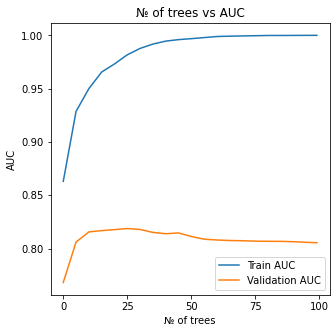

In [428]:
plt.figure(figsize=(5,5))
plt.plot(tree, aucs_train, label='Train AUC')
plt.plot(tree, aucs_valid, label='Validation AUC')
plt.xticks(range(0, 101, 25))

plt.title('№ of trees vs AUC')
plt.xlabel('№ of trees')
plt.ylabel('AUC')
plt.legend()

plt.show()

# Parameter tuning for XGBoost

1. eta - learning rate
2. max_depth - depth of each tree
3. min_child_weight - similar to min_leaf_size

About eta: in boosting every new tree corrects the mistakes of the previous, hence if eta is too big -> model overweights the prev. predicitons, but if it's small -> only small fraction is corrected. I.e. eta too big -> overfit early, eta too small -> too many trees required to produce good result.

Large datasets: 0.3
Small datasets: 0.1 or 0.05

In [429]:
%%capture output
# in all 4 rounds below we'll use 500 trees
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [430]:
tree, aucs_train, aucs_valid_03 = parse_xgb_output(output)
print(f"max AUC: {max(aucs_valid_03)}")
print(max(zip(aucs_valid_03, tree)))

max AUC: 0.81788
(0.81788, 30)


In [431]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1
}


model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [432]:
tree, aucs_train, aucs_valid_01 = parse_xgb_output(output)
print(f"max AUC: {max(aucs_valid_01)}")
print(max(zip(aucs_valid_01, tree)))

max AUC: 0.82476
(0.82476, 70)


In [433]:
%%capture output

xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1
}


model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [434]:
tree, aucs_train, aucs_valid_005 = parse_xgb_output(output)
print(f"max AUC: {max(aucs_valid_005)}")
print(max(zip(aucs_valid_005, tree)))

max AUC: 0.82297
(0.82297, 120)


In [435]:
%%capture output

xgb_params = {
    'eta': 0.01,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1
}


model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [436]:
tree, aucs_train, aucs_valid_001 = parse_xgb_output(output)
print(f"max AUC: {max(aucs_valid_001)}")
print(max(zip(aucs_valid_001, tree)))

max AUC: 0.82168
(0.82168, 499)


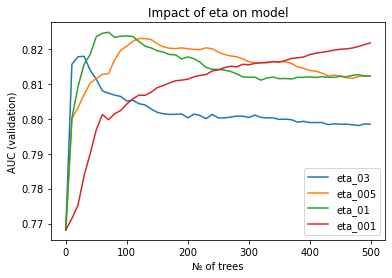

In [437]:
plt.plot(tree, aucs_valid_03, label='eta_03')
plt.plot(tree, aucs_valid_005, label='eta_005')
plt.plot(tree, aucs_valid_01, label='eta_01')
plt.plot(tree, aucs_valid_001, label='eta_001')
plt.xlabel('№ of trees')
plt.title('Impact of eta on model')
plt.ylabel('AUC (validation)')
plt.xticks(range(0, 501, 100))

plt.legend()
plt.show()

<h4>Next param. is `max_depth`. Default is 6, so we'll
try lower & upper values to figure out the direction</h4>

In [438]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
 
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1
}

model = xgb.train(xgb_params, dtrain,
                    num_boost_round=500,
                    verbose_eval=10, evals=watchlist)

In [439]:
tree, _, aucs_val_depth_3 = parse_xgb_output(output)
print(max(aucs_val_depth_3))
print(max(zip(aucs_val_depth_3, tree)))

0.83657
(0.83657, 180)


In [440]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 10,
    'min_child_weight': 1,
 
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1 
}

model = xgb.train(xgb_params, dtrain,
                    num_boost_round=500,
                    verbose_eval=10, evals=watchlist)

In [441]:
tree, _, aucs_val_depth_10 = parse_xgb_output(output)
print(max(aucs_val_depth_10))
print(max(zip(aucs_val_depth_10, tree)))

0.81169
(0.81169, 100)


In [442]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 4,
    'min_child_weight': 1,
 
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1 
}

model = xgb.train(xgb_params, dtrain,
                    num_boost_round=500,
                    verbose_eval=10, evals=watchlist)

In [443]:
tree, _, aucs_val_depth_4 = parse_xgb_output(output)
print(max(aucs_val_depth_4))
print(max(zip(aucs_val_depth_4, tree)))

0.83014
(0.83014, 80)


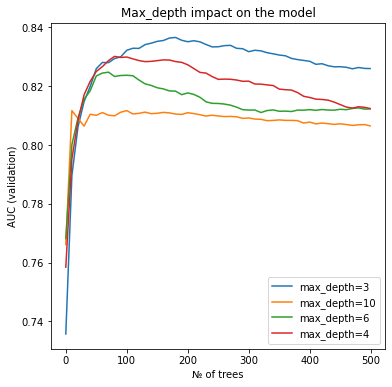

In [444]:
plt.figure(figsize=(6, 6))
plt.plot(tree, aucs_val_depth_3, label='max_depth=3')
plt.plot(tree, aucs_val_depth_10, label='max_depth=10')
plt.plot(tree, aucs_valid_01, label='max_depth=6')
plt.plot(tree, aucs_val_depth_4, label='max_depth=4')

plt.xlabel('№ of trees')
plt.ylabel('AUC (validation)')
plt.title('Max_depth impact on the model')
plt.xticks(range(0, 501, 100))

plt.legend()
plt.show()

In [445]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 10,
 
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1
}

model = xgb.train(xgb_params, dtrain, verbose_eval=10,
                  num_boost_round=500,
                  evals=watchlist)

In [446]:
tree, _, aucs_val_minLeaf_10 = parse_xgb_output(output)
print(max(aucs_val_minLeaf_10))
print(max(zip(aucs_val_minLeaf_10, tree)))

0.83336
(0.83336, 150)


In [447]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 30,
 
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1
}

model = xgb.train(xgb_params, dtrain, verbose_eval=10,
                  num_boost_round=500,
                  evals=watchlist)

In [448]:
tree, _, aucs_val_minLeaf_30 = parse_xgb_output(output)
print(max(aucs_val_minLeaf_30))
print(max(zip(aucs_val_minLeaf_30, tree)))

0.83543
(0.83543, 160)


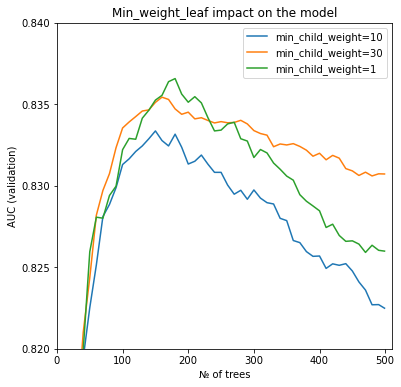

In [449]:
plt.figure(figsize=(6, 6))
plt.plot(tree, aucs_val_minLeaf_10, label='min_child_weight=10')
plt.plot(tree, aucs_val_minLeaf_30, label='min_child_weight=30')
plt.plot(tree, aucs_val_depth_3, label='min_child_weight=1')

plt.ylim(0.82, 0.84)
plt.xlim(0, 510)

plt.title('Min_weight_leaf impact on the model')
plt.xlabel('№ of trees')
plt.ylabel('AUC (validation)')

plt.xticks(range(0, 501, 100))
plt.yticks(np.linspace(0.82, 0.84, 5))

plt.legend()
plt.show()

<h4>But how do we select the best number of trees?</h4>

**Look at the best model and there you'll see the number of trees at which that model gives top params. In our case - 180**

In [450]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1
}

model = xgb.train(xgb_params, dtrain, 
                  evals=watchlist, num_boost_round=500,
                  verbose_eval=10)

In [451]:
tree, _, aucs_final = parse_xgb_output(output)
print(max(aucs_final))
print(max(zip(aucs_final, tree)))

0.83657
(0.83657, 180)


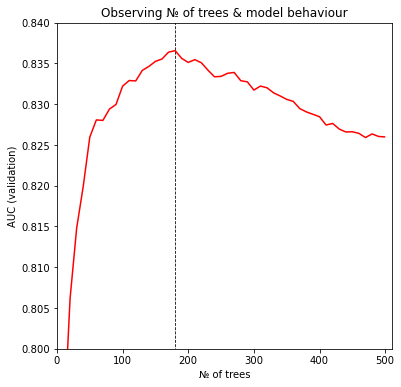

In [452]:
plt.figure(figsize=(6, 6))

plt.plot(tree, aucs_final, color='red')

plt.ylim(0.80, 0.84)
plt.xlim(0, 510)

plt.title('Observing № of trees & model behaviour')
plt.xlabel('№ of trees')
plt.ylabel('AUC (validation)')

plt.vlines(180, 0, 1, color='black', linewidth=0.8,
           linestyle='dashed')

plt.xticks(range(0, 501, 100))
plt.yticks(np.linspace(0.80, 0.84, 9))

plt.show()

# Final model

In [453]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1
}

model = xgb.train(xgb_params, dtrain, 
                  evals=watchlist, num_boost_round=180,
                  verbose_eval=10)

[0]	train-auc:0.77424	valid-auc:0.73571
[10]	train-auc:0.84733	valid-auc:0.78964
[20]	train-auc:0.86359	valid-auc:0.80617
[30]	train-auc:0.87855	valid-auc:0.81478
[40]	train-auc:0.88701	valid-auc:0.81990
[50]	train-auc:0.89458	valid-auc:0.82595
[60]	train-auc:0.90159	valid-auc:0.82807
[70]	train-auc:0.90650	valid-auc:0.82801
[80]	train-auc:0.91110	valid-auc:0.82940
[90]	train-auc:0.91428	valid-auc:0.82997
[100]	train-auc:0.91801	valid-auc:0.83221
[110]	train-auc:0.92205	valid-auc:0.83290
[120]	train-auc:0.92460	valid-auc:0.83285
[130]	train-auc:0.92843	valid-auc:0.83414
[140]	train-auc:0.93100	valid-auc:0.83463
[150]	train-auc:0.93296	valid-auc:0.83525
[160]	train-auc:0.93551	valid-auc:0.83554
[170]	train-auc:0.93788	valid-auc:0.83638
[179]	train-auc:0.93962	valid-auc:0.83648


In [454]:
y_pred_xgb = model.predict(dvalid)

In [455]:
print(roc_auc_score(y_valid, y_pred_dt))
print(roc_auc_score(y_valid, y_pred_rf))
print(roc_auc_score(y_valid, y_pred_xgb))
# gradient boosting model is the best one
# among all three

0.7853194400716863
0.8253826499721489
0.8364807100821002


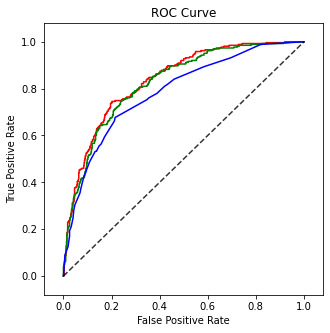

In [456]:
plt.figure(figsize=(5, 5))

fpr, tpr, thresholds = roc_curve(y_valid, y_pred_xgb)
plt.plot(fpr, tpr, color='red')

fpr, tpr, thresholds = roc_curve(y_valid, y_pred_rf)
plt.plot(fpr, tpr, color='green')

fpr, tpr, thresholds = roc_curve(y_valid, y_pred_dt)
plt.plot(fpr, tpr, color='blue')

plt.plot([0, 1], [0, 1], color='black', alpha=0.8, linestyle='dashed')

plt.xlim([-0.08, 1.08])
plt.ylim([-0.08, 1.08])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC Curve')
plt.show()

# Using model

In [457]:
y_train = (full_train.status == 'default').values
y_test = (df_test.status == 'default').values

del full_train['status']
del df_test['status']

In [458]:
full_train.isnull().sum()

seniority     0
home          0
time          0
age           0
marital       0
records       0
job           0
expenses      0
income       30
assets       38
debt         14
amount        0
price         0
dtype: int64

In [459]:
df_test.isnull().sum()

seniority    0
home         0
time         0
age          0
marital      0
records      0
job          0
expenses     0
income       4
assets       9
debt         4
amount       0
price        0
dtype: int64

In [460]:
df_test = df_test.fillna(0)
full_train = full_train.fillna(0)

In [461]:
dict_full_train = full_train.to_dict(orient='records')
dict_test = df_test.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dict_full_train)
X_test = dv.transform(dict_test)

In [462]:
# random forest
rf = RandomForestClassifier(n_estimators=200, max_depth=10,
                            min_samples_leaf=5, random_state=1)

rf.fit(X_full_train, y_train)
y_rf_final = rf.predict_proba(X_test)[:, 1]

In [463]:
# XGB Boost
d_fulltrain = xgb.DMatrix(X_full_train, label=y_train,
                          feature_names=dv.feature_names_)
d_test = xgb.DMatrix(X_test, label=y_test,
                     feature_names=dv.feature_names_)

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

trees = 180

model_final = xgb.train(xgb_params, d_fulltrain, num_boost_round=trees)

In [464]:
y_xgb_final = model_final.predict(d_test)

In [465]:
print(f"{round(roc_auc_score(y_test, y_rf_final), 4) * 100}%") 
print(f"{round(roc_auc_score(y_test, y_xgb_final), 4) * 100}%") 

83.11%
83.27%


# About Feature importance

<h3>Decision Trees</h3>

In [314]:
# Decision Trees
dt.feature_importances_

array([0.01387723, 0.04970444, 0.1226385 , 0.00833288, 0.0250906 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.18548089, 0.00699145, 0.        ,
       0.        , 0.17292753, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.0302163 ,
       0.24421676, 0.        , 0.12658146, 0.01394197])

In [315]:
list(zip(dv.feature_names_, dt.feature_importances_))

[('age', 0.013877231876069155),
 ('amount', 0.04970443671934234),
 ('assets', 0.1226385042392285),
 ('debt', 0.008332876385504904),
 ('expenses', 0.02509060257588133),
 ('home=ignore', 0.0),
 ('home=other', 0.0),
 ('home=owner', 0.0),
 ('home=parents', 0.0),
 ('home=private', 0.0),
 ('home=rent', 0.0),
 ('home=unk', 0.0),
 ('income', 0.185480885992072),
 ('job=fixed', 0.006991445659436668),
 ('job=freelance', 0.0),
 ('job=others', 0.0),
 ('job=partime', 0.17292752964348088),
 ('job=unk', 0.0),
 ('marital=divorced', 0.0),
 ('marital=married', 0.0),
 ('marital=separated', 0.0),
 ('marital=single', 0.0),
 ('marital=unk', 0.0),
 ('marital=widow', 0.0),
 ('price', 0.030216298419676546),
 ('records=no', 0.2442167576209344),
 ('records=yes', 0.0),
 ('seniority', 0.12658145602795504),
 ('time', 0.013941974840418335)]

In [319]:
df_imp = pd.DataFrame(list(zip(dv.feature_names_,
                            dt.feature_importances_)),
                   columns=['feature', 'importance'])
df_imp = df_imp.sort_values(by='importance', ascending=False)
df_imp

,feature,importance
25,records=no,0.244217
12,income,0.185481
16,job=partime,0.172928
27,seniority,0.126581
2,assets,0.122639
1,amount,0.049704
24,price,0.030216
4,expenses,0.025091
28,time,0.013942
0,age,0.013877


In [320]:
# let's trim the ones with 0
df_imp = df_imp[df_imp.importance > 0]

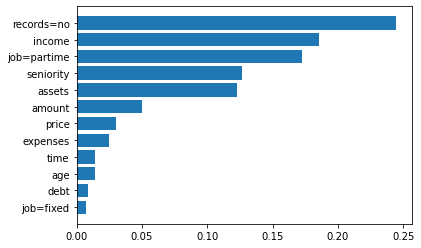

In [323]:
num = len(df_imp)

plt.barh(range(num), df_imp.importance[::-1])
plt.yticks(range(num), df_imp.feature[::-1])

plt.show()

# Random Forest

In [324]:
rf.feature_importances_

array([4.06791244e-02, 7.83730317e-02, 8.34285747e-02, 8.46789628e-03,
       2.77231622e-02, 0.00000000e+00, 4.35332029e-03, 2.72283027e-02,
       7.43385067e-03, 1.72100569e-03, 1.27067800e-02, 0.00000000e+00,
       1.53974865e-01, 5.44227630e-02, 8.55356969e-03, 2.20799115e-03,
       7.11524725e-02, 0.00000000e+00, 0.00000000e+00, 5.48155167e-03,
       5.82599168e-04, 4.68070697e-03, 0.00000000e+00, 4.39436900e-07,
       5.32275128e-02, 1.11491232e-01, 8.84744931e-02, 1.28101753e-01,
       2.55330019e-02])

In [327]:
df_imp_rf = pd.DataFrame(list(zip(dv.feature_names_, 
                         rf.feature_importances_)),
                         columns=['feature', 'importance'])
df_imp_rf = df_imp_rf.sort_values(by='importance', ascending=False)
df_imp_rf

,feature,importance
12,income,1.539749e-01
27,seniority,1.281018e-01
25,records=no,1.114912e-01
26,records=yes,8.847449e-02
2,assets,8.342857e-02
1,amount,7.837303e-02
16,job=partime,7.115247e-02
13,job=fixed,5.442276e-02
24,price,5.322751e-02
0,age,4.067912e-02


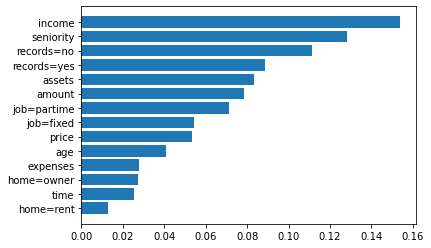

In [330]:
df_imp_rf = df_imp_rf[df_imp_rf.importance > 0.01]

num = len(df_imp_rf)
plt.barh(range(num), df_imp_rf.importance[::-1])
plt.yticks(range(num), df_imp_rf.feature[::-1])

plt.show()

# XGBoost

In [343]:
scores = model_final.get_score(importance_type='gain')
# scores = sorted(scores.items(), key=lambda x: x[1])
scores = sorted(scores.items(), key=lambda x: x[1])
list(reversed(scores))

[('records=no', 26.31951763216363),
 ('job=partime', 23.727298970681826),
 ('job=fixed', 23.242334534285714),
 ('seniority', 12.569803596550008),
 ('income', 10.226509355553322),
 ('home=owner', 8.77446153888889),
 ('assets', 7.979409969931147),
 ('amount', 6.636730347614459),
 ('time', 5.8198804727999995),
 ('home=parents', 5.473167305680001),
 ('home=rent', 5.32601094),
 ('expenses', 4.598659150814814),
 ('debt', 4.429378920499999),
 ('price', 4.298747235866309),
 ('home=other', 4.106519452750001),
 ('marital=separated', 3.8035560748750004),
 ('age', 3.304868339672727),
 ('home=private', 3.2902822034000003),
 ('job=freelance', 3.0049305),
 ('marital=married', 2.73327298625),
 ('job=others', 2.2390782849999997),
 ('marital=widow', 1.3263796206),
 ('home=ignore', 0.694909334)]

In [357]:
scores = model.get_score(importance_type='weight')
scores = sorted(scores.items(), key=lambda x: x[1])
list(reversed(scores))

[('price', 165),
 ('amount', 162),
 ('assets', 142),
 ('income', 133),
 ('seniority', 119),
 ('age', 109),
 ('expenses', 92),
 ('debt', 63),
 ('records=no', 60),
 ('time', 29),
 ('home=parents', 22),
 ('job=partime', 21),
 ('job=fixed', 19),
 ('marital=separated', 13),
 ('home=private', 12),
 ('marital=married', 11),
 ('home=rent', 8),
 ('home=owner', 6),
 ('home=ignore', 5),
 ('job=freelance', 4),
 ('home=other', 3),
 ('job=others', 1)]

In [358]:
names = list(map(lambda x: x[0], scores))
scores = [score for _, score in scores]

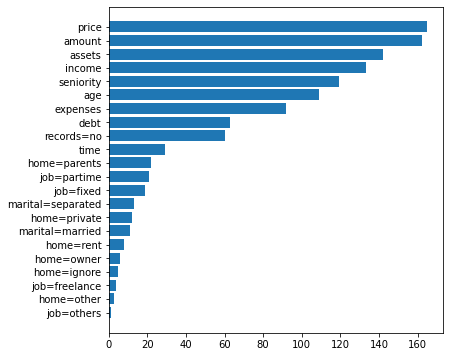

In [360]:
plt.figure(figsize=(6, 6))

plt.barh(np.arange(len(scores)), scores)
plt.yticks(np.arange(len(names)), names)

plt.show()

# Extremely randomized trees

In [361]:
from sklearn.ensemble import ExtraTreesClassifier

In [363]:
aucs = []

for i in range(10, 201, 10):
    rf = ExtraTreesClassifier(n_estimators=i, max_depth=30)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_valid)[:, 1]
    auc = roc_auc_score(y_valid, y_pred)
    print(f"{i}, {round(auc, 4)}")
    aucs.append(auc)

10, 0.7573
20, 0.7767
30, 0.7905
40, 0.7882
50, 0.7914
60, 0.8017
70, 0.7926
80, 0.7893
90, 0.7931
100, 0.7959
110, 0.7919
120, 0.7913
130, 0.7943
140, 0.7919
150, 0.7931
160, 0.7993
170, 0.7969
180, 0.7967
190, 0.7946
200, 0.7998
